In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [109]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
     ---------------------------------------- 99.8/99.8 MB 5.7 MB/s eta 0:00:00



In [17]:
bikeRental_df = pd.read_csv('./bikeRentalDataset/hour.csv')

In [18]:
bike_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [22]:
data = bikeRental_df.drop(["instant", "dteday", "casual", "registered"], axis = 1)
# data.head(10)
data.shape

(17379, 13)

In [28]:
input_df = data.drop(columns = ["cnt"])
output_df = data["cnt"]
# input_df.head(10)
output_df.head(10)

0    16
1    40
2    32
3    13
4     1
5     1
6     2
7     3
8     8
9    14
Name: cnt, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

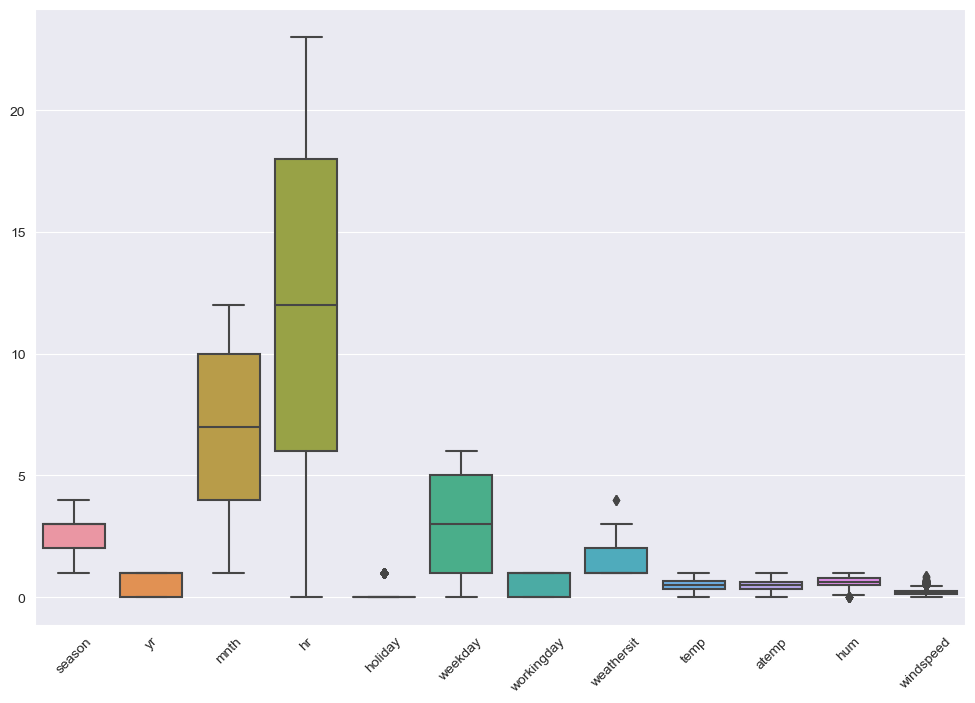

In [42]:
plt.figure(figsize = (12,8))
sns.boxplot(data = input_df)

plt.xticks(rotation=45)
plt.show()

In [32]:
scaler = MinMaxScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [38]:
X_train_df = pd.DataFrame(X_train_scaler, columns = input_df.columns)
X_test_df = pd.DataFrame(X_test_scaler, columns = input_df.columns)

X_train_df.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0.000000,0.0,0.000000,0.478261,0.0,1.000000,0.0,0.000000,0.183673,0.1970,0.55,0.263195
1,1.000000,0.0,0.818182,0.782609,0.0,0.333333,1.0,0.000000,0.510204,0.5000,0.42,0.122840
2,1.000000,0.0,1.000000,0.130435,0.0,0.500000,1.0,0.666667,0.448980,0.4545,1.00,0.263195
3,0.333333,0.0,0.272727,0.782609,0.0,0.000000,0.0,0.333333,0.448980,0.4545,0.31,0.000000
4,0.000000,0.0,1.000000,0.260870,0.0,0.000000,0.0,0.000000,0.183673,0.2273,0.75,0.122840
5,0.333333,1.0,0.454545,0.695652,0.0,0.500000,1.0,0.000000,0.714286,0.6515,0.30,0.578935
6,0.000000,0.0,0.000000,0.652174,0.0,0.333333,1.0,0.333333,0.204082,0.2273,0.87,0.193018
7,1.000000,1.0,0.818182,0.173913,0.0,0.000000,0.0,0.000000,0.408163,0.4242,0.77,0.333373
8,0.000000,1.0,0.181818,0.565217,0.0,0.333333,1.0,0.000000,0.591837,0.5758,0.78,0.228047
9,0.000000,0.0,0.090909,0.652174,0.0,0.666667,1.0,0.000000,0.204082,0.1970,0.37,0.386035


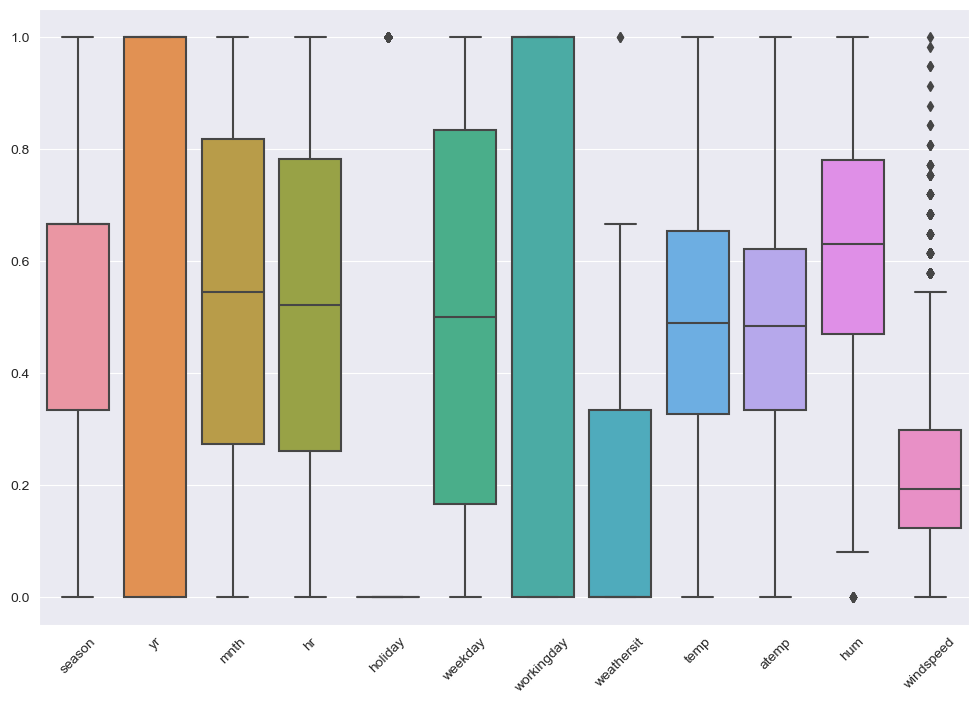

In [43]:
plt.figure(figsize = (12,8))
sns.boxplot(data = X_train_df)

plt.xticks(rotation=45)
plt.show()

**By Using Neural Networks:**

In [161]:
# model = Sequential([
#     Dense(128, input_dim = X_train_df.shape[1], activation = 'relu'),
#     Dense(64, activation = 'relu'),
#     Dense(32, activation = 'relu'),
#     Dense(16, activation = 'relu'),
#     Dense(1)])

In [162]:
# model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [163]:
# history = model.fit(X_train_df, Y_train, epochs = 100, batch_size = 48, validation_split=0.2)

Epoch 1/100
232/232 [==============================] - 3s 5ms/step - loss: 41052.1797 - mae: 147.8962 - val_loss: 25098.9004 - val_mae: 122.4959
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 21623.9043 - mae: 111.2118 - val_loss: 20503.7891 - val_mae: 103.5445
Epoch 3/100
232/232 [==============================] - 1s 4ms/step - loss: 20068.7227 - mae: 103.9831 - val_loss: 20169.8516 - val_mae: 99.0731
Epoch 4/100
232/232 [==============================] - 1s 4ms/step - loss: 19595.5156 - mae: 102.4627 - val_loss: 19652.1133 - val_mae: 97.2194
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 19043.3438 - mae: 100.6210 - val_loss: 18839.2383 - val_mae: 103.7435
Epoch 6/100
232/232 [==============================] - 1s 4ms/step - loss: 18309.7168 - mae: 98.5042 - val_loss: 18243.1074 - val_mae: 102.7311
Epoch 7/100
232/232 [==============================] - 1s 4ms/step - loss: 17475.2637 - mae: 95.5365 - val_loss: 17164.5410 - val_mae

232/232 [==============================] - 1s 4ms/step - loss: 2274.1194 - mae: 30.9709 - val_loss: 2292.5508 - val_mae: 29.7792
Epoch 59/100
232/232 [==============================] - 1s 4ms/step - loss: 2130.4553 - mae: 29.9770 - val_loss: 2978.9307 - val_mae: 34.6973
Epoch 60/100
232/232 [==============================] - 1s 4ms/step - loss: 2115.9585 - mae: 29.7909 - val_loss: 2491.6421 - val_mae: 31.0250
Epoch 61/100
232/232 [==============================] - 1s 4ms/step - loss: 2083.5142 - mae: 29.6866 - val_loss: 2671.6409 - val_mae: 32.8227
Epoch 62/100
232/232 [==============================] - 1s 4ms/step - loss: 2032.1278 - mae: 29.1328 - val_loss: 2322.9912 - val_mae: 29.8356
Epoch 63/100
232/232 [==============================] - 1s 4ms/step - loss: 2092.3250 - mae: 29.5418 - val_loss: 2246.1851 - val_mae: 29.4999
Epoch 64/100
232/232 [==============================] - 1s 4ms/step - loss: 2073.6816 - mae: 29.2621 - val_loss: 2461.3228 - val_mae: 31.2042
Epoch 65/100
232/23

In [164]:
# training_loss = history.history["loss"]
# validation_loss = history.history["val_loss"]

# epochs = range(1, len(training_loss) + 1)

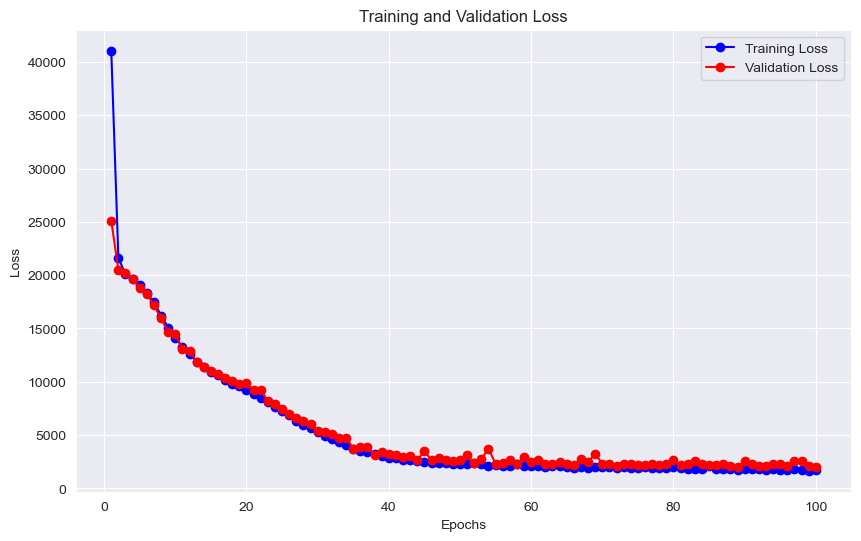

In [171]:
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
# plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [166]:
# y_pred = model.predict(X_test_df)

109/109 [==============================] - 0s 2ms/step


In [167]:
# r2 = r2_score(Y_test, y_pred)

# print(f'R2: {r2}')

R2: 0.9399656434021882


In [168]:
# rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

# print(f'RMSE: {rmse}')

RMSE: 43.60060316084209


**Using XGBoost:**

In [172]:
model = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 180)

In [173]:
model.fit(X_train_df, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [176]:
y_pred = model.predict(X_test_df)

In [177]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'mse: {mse}')
print(f'r2_score: {r2}')

mse: 1579.713360158982
r2_score: 0.9501123372952922
